In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/Users/daray/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("healthcare_dataset.csv")

data.head()
data.shape

(55500, 15)

Check the null and duplicates on the datasets. Remove duplicates and null rows

In [4]:
#null and duplicatess
#0 null data  
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
#534 duplicated row 
data.loc[data.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [6]:
#drop duplicates 
data.drop_duplicates()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [7]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Go through each variables, turn them into correct format and usable variable. 
Get the inpatient days from admission and dischage dates, 
Get admission year and month from admission date, 
Get the per day cost from billing amount/inpatient days. 

In [8]:
data['Gender'].value_counts()

Male      27774
Female    27726
Name: Gender, dtype: int64

In [9]:
data["Blood Type"].value_counts

<bound method IndexOpsMixin.value_counts of 0         B-
1         A+
2         A-
3         O+
4        AB+
        ... 
55495     O+
55496    AB-
55497     B+
55498     O-
55499     O+
Name: Blood Type, Length: 55500, dtype: object>

In [10]:
data["Medical Condition"].value_counts()

Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: Medical Condition, dtype: int64

In [11]:
data['Hospital'].value_counts()

LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: Hospital, Length: 39876, dtype: int64

In [12]:
data['Insurance Provider'].value_counts()

Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: Insurance Provider, dtype: int64

In [13]:
data['Admission Type'].value_counts()

Elective     18655
Urgent       18576
Emergency    18269
Name: Admission Type, dtype: int64

In [14]:
data["Medication"].value_counts()

Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: Medication, dtype: int64

In [15]:
data['Test Results'].value_counts()

Abnormal        18627
Normal          18517
Inconclusive    18356
Name: Test Results, dtype: int64

In [16]:
data["Doctor"].value_counts()

Michael Smith           27
Robert Smith            22
John Smith              22
Michael Johnson         20
James Smith             20
                        ..
Audrey Zimmerman DDS     1
Justin Banks             1
Joseph Williams Jr.      1
Jason Franklin           1
Jeffrey Moore            1
Name: Doctor, Length: 40341, dtype: int64

In [17]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])


In [18]:
data['Inpatient Days']= (data['Discharge Date'] - data['Date of Admission']).dt.days+1

In [19]:
data["Admission Year"]=data["Date of Admission"].dt.year
data["Admission Month"]=data["Date of Admission"].dt.month

In [20]:
#Per day Expense 
data["Per Day Amount"]=data["Billing Amount"]/data["Inpatient Days"]

In [21]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Inpatient Days,Admission Year,Admission Month,Per Day Amount
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,3,2024,1,6285.427102
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,7,2019,8,4806.189612
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,16,2022,9,1747.193505
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,31,2020,11,1222.896207
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,21,2022,9,678.015134


In [23]:
df = data.drop(columns=["Name","Date of Admission","Doctor","Room Number","Discharge Date","Hospital","Doctor"])

In [1]:
df.shape

NameError: name 'df' is not defined

Exploratory data analysis to potential variables 

In [26]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,55500.0,NaN,NaN,NaN,51.539459,19.602454,13.0,35.0,52.0,68.0,89.0
Gender,55500,2,Male,27774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,55500,8,A-,6969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,55500,6,Arthritis,9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,55500,5,Cigna,11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,55500.0,NaN,NaN,NaN,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736
Admission Type,55500,3,Elective,18655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medication,55500,5,Lipitor,11140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test Results,55500,3,Abnormal,18627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inpatient Days,55500.0,NaN,NaN,NaN,16.509009,8.6596,2.0,9.0,16.0,24.0,31.0


Plot between Categorical variable with Per Day Amount 

<AxesSubplot:xlabel='Admission Month', ylabel='Per Day Amount'>

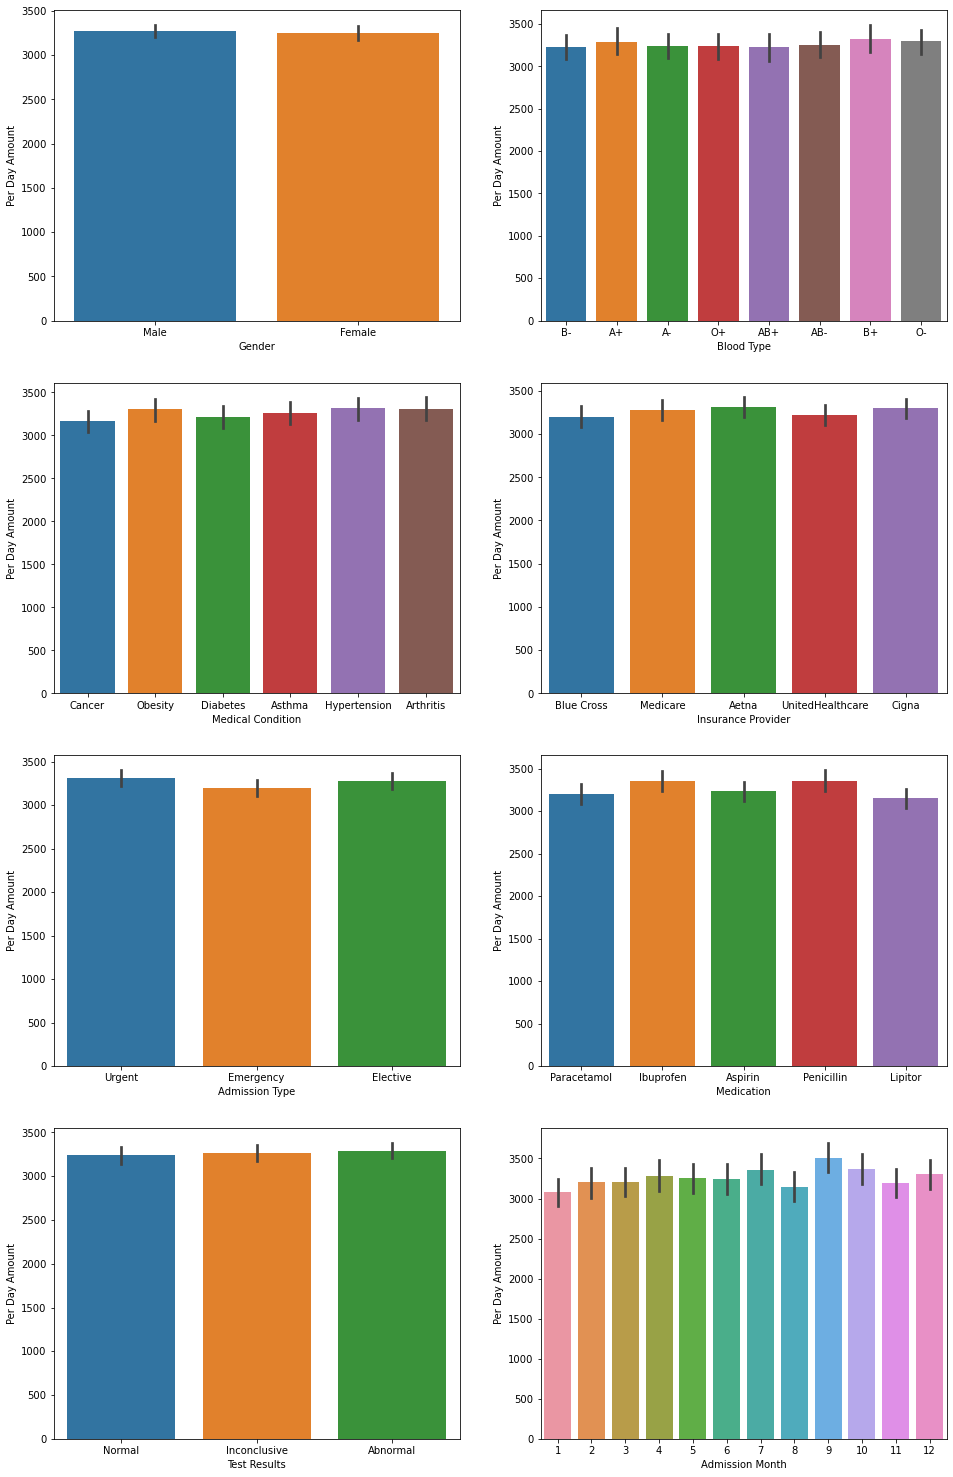

In [27]:

plt.figure(figsize = (16, 40))
plt.title("Categorical Variable VS. Per Day Amount")


plt.subplot(6,2,1)
sns.barplot(x ='Gender', y ='Per Day Amount', data = df, estimator = np.std)

plt.subplot(6,2,2)
sns.barplot(x ='Blood Type', y ='Per Day Amount', data = df, estimator = np.std)

plt.subplot(6,2,3)
sns.barplot(x ='Medical Condition', y ='Per Day Amount', data = df, estimator = np.std)

plt.subplot(6,2,4)
sns.barplot(x ='Insurance Provider', y ='Per Day Amount', data = df, estimator = np.std)

plt.subplot(6,2,5)
sns.barplot(x ='Admission Type', y ='Per Day Amount', data = df, estimator = np.std)

plt.subplot(6,2,6)
sns.barplot(x ='Medication', y ='Per Day Amount', data = df, estimator = np.std)

plt.subplot(6,2,7)
sns.barplot(x ='Test Results', y ='Per Day Amount', data = df, estimator = np.std)

plt.subplot(6,2,8)
sns.barplot(x ='Admission Month', y ='Per Day Amount', data = df, estimator = np.std)



<AxesSubplot:xlabel='Admission Month', ylabel='Billing Amount'>

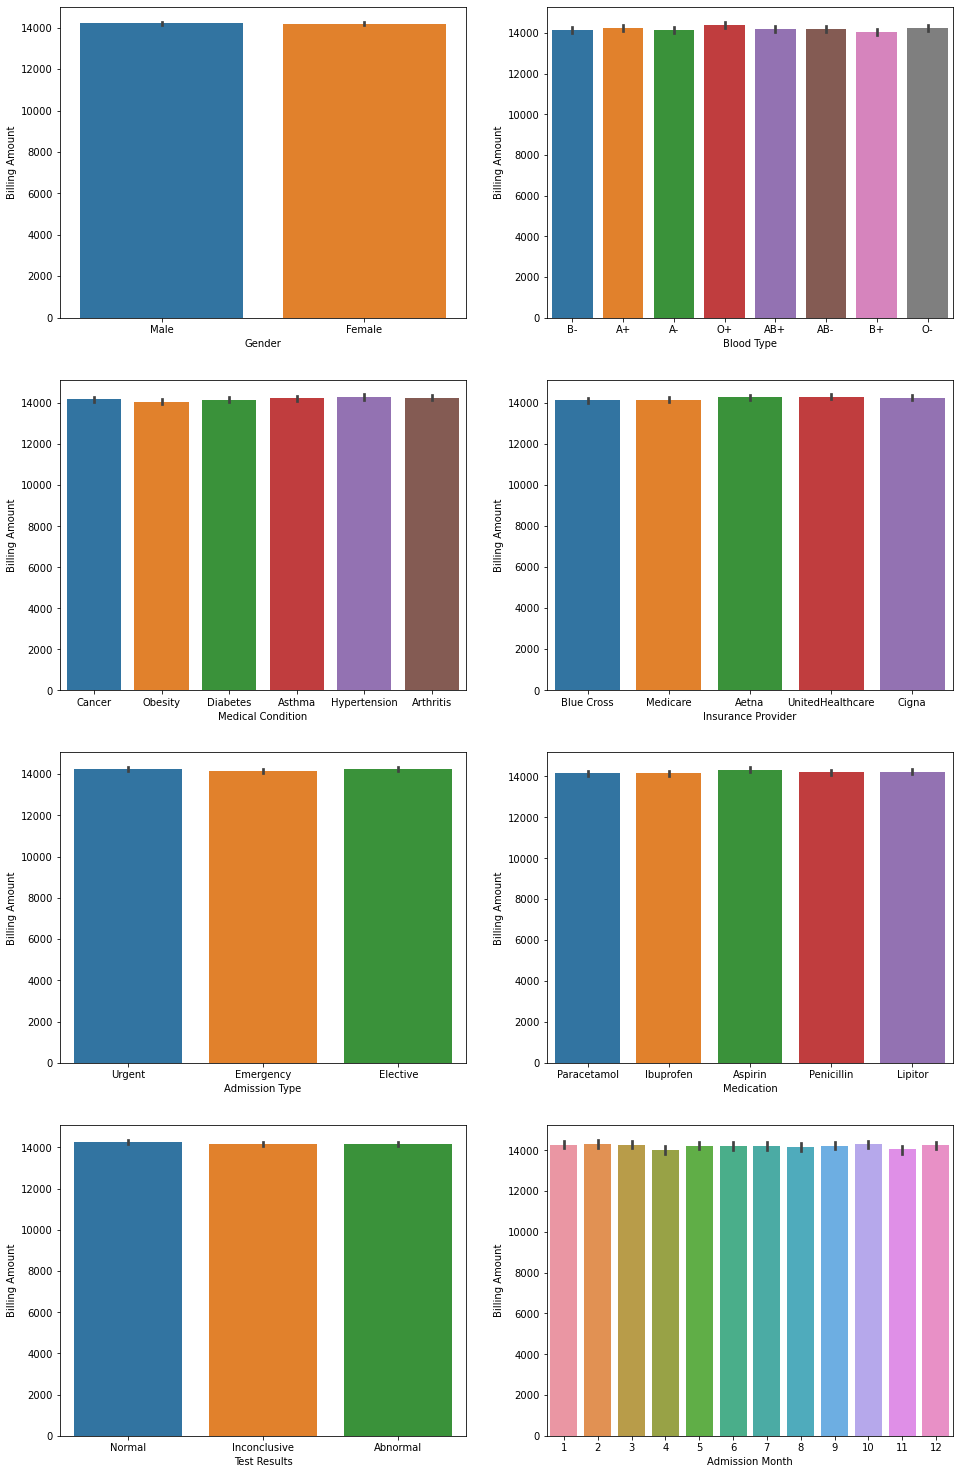

In [28]:
plt.figure(figsize = (16, 40))
plt.title("Categorical Variable VS. Billing Amount ")


plt.subplot(6,2,1)
sns.barplot(x ='Gender', y ='Billing Amount', data = df, estimator = np.std)

plt.subplot(6,2,2)
sns.barplot(x ='Blood Type', y ='Billing Amount', data = df, estimator = np.std)

plt.subplot(6,2,3)
sns.barplot(x ='Medical Condition', y ='Billing Amount', data = df, estimator = np.std)

plt.subplot(6,2,4)
sns.barplot(x ='Insurance Provider', y ='Billing Amount', data = df, estimator = np.std)

plt.subplot(6,2,5)
sns.barplot(x ='Admission Type', y ='Billing Amount', data = df, estimator = np.std)

plt.subplot(6,2,6)
sns.barplot(x ='Medication', y ='Billing Amount', data = df, estimator = np.std)

plt.subplot(6,2,7)
sns.barplot(x ='Test Results', y ='Billing Amount', data = df, estimator = np.std)

plt.subplot(6,2,8)
sns.barplot(x ='Admission Month', y ='Billing Amount', data = df, estimator = np.std)



Plot Numerical Variable with Per day Amount 

<AxesSubplot:xlabel='Age', ylabel='Per Day Amount'>

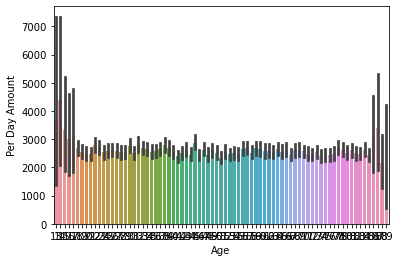

In [30]:
sns.barplot(data=df, x="Age", y="Per Day Amount")

<AxesSubplot:xlabel='Inpatient Days', ylabel='Per Day Amount'>

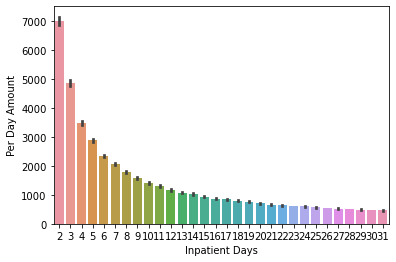

In [32]:
sns.barplot(x ='Inpatient Days', y ='Per Day Amount', data = df, estimator = np.std)


Check Correlation between categorical Variables 
https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7
Chi-Square Test 

In [33]:
## Importing required libraries
import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

In [29]:
#Get all Categorical variables 
df.columns
df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])

In [30]:
cat_var

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [31]:
df_cat = df[cat_var]
df_cat

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
0,Male,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,Male,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,Female,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,Female,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,Female,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...
55495,Female,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,Female,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,Female,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,Male,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


In [32]:
cat_var1 = ('Gender','Blood Type','Medical Condition','Insurance Provider','Admission Type',
 'Medication','Test Results')

cat_var2 = ('Gender','Blood Type','Medical Condition','Insurance Provider','Admission Type',
 'Medication','Test Results')
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list

cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [33]:
cat_var_prod

[('Gender', 'Gender'),
 ('Gender', 'Blood Type'),
 ('Gender', 'Medical Condition'),
 ('Gender', 'Insurance Provider'),
 ('Gender', 'Admission Type'),
 ('Gender', 'Medication'),
 ('Gender', 'Test Results'),
 ('Blood Type', 'Gender'),
 ('Blood Type', 'Blood Type'),
 ('Blood Type', 'Medical Condition'),
 ('Blood Type', 'Insurance Provider'),
 ('Blood Type', 'Admission Type'),
 ('Blood Type', 'Medication'),
 ('Blood Type', 'Test Results'),
 ('Medical Condition', 'Gender'),
 ('Medical Condition', 'Blood Type'),
 ('Medical Condition', 'Medical Condition'),
 ('Medical Condition', 'Insurance Provider'),
 ('Medical Condition', 'Admission Type'),
 ('Medical Condition', 'Medication'),
 ('Medical Condition', 'Test Results'),
 ('Insurance Provider', 'Gender'),
 ('Insurance Provider', 'Blood Type'),
 ('Insurance Provider', 'Medical Condition'),
 ('Insurance Provider', 'Insurance Provider'),
 ('Insurance Provider', 'Admission Type'),
 ('Insurance Provider', 'Medication'),
 ('Insurance Provider', 'Tes

In [34]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))

result


[('Gender', 'Blood Type', 0.047421863421312375),
 ('Gender', 'Medical Condition', 0.9447057765170073),
 ('Gender', 'Insurance Provider', 0.5989884111796873),
 ('Gender', 'Admission Type', 0.0066571285575001025),
 ('Gender', 'Medication', 0.1769963078457054),
 ('Gender', 'Test Results', 0.3645194115525123),
 ('Blood Type', 'Gender', 0.04742186342131233),
 ('Blood Type', 'Medical Condition', 0.4767568949673896),
 ('Blood Type', 'Insurance Provider', 0.19473401478241106),
 ('Blood Type', 'Admission Type', 0.5116889255279071),
 ('Blood Type', 'Medication', 0.5191487795399277),
 ('Blood Type', 'Test Results', 0.9076188241892073),
 ('Medical Condition', 'Gender', 0.9447057765170073),
 ('Medical Condition', 'Blood Type', 0.4767568949673896),
 ('Medical Condition', 'Insurance Provider', 0.8054447875790507),
 ('Medical Condition', 'Admission Type', 0.036171783236322336),
 ('Medical Condition', 'Medication', 0.420948663990984),
 ('Medical Condition', 'Test Results', 0.20975788848479066),
 ('Insu

In [35]:
chi_test_output = pd.DataFrame(result,columns = ["var1", "var2", "coeff"])
                                                  
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,Admission Type,Blood Type,Gender,Insurance Provider,Medical Condition,Medication,Test Results
var1,,,,,,,
Admission Type,NaN,0.511689,0.006657,0.011718,0.036172,0.691456,0.858006
Blood Type,0.511689,NaN,0.047422,0.194734,0.476757,0.519149,0.907619
Gender,0.006657,0.047422,NaN,0.598988,0.944706,0.176996,0.364519
Insurance Provider,0.011718,0.194734,0.598988,NaN,0.805445,0.830193,0.397485
Medical Condition,0.036172,0.476757,0.944706,0.805445,NaN,0.420949,0.209758
Medication,0.691456,0.519149,0.176996,0.830193,0.420949,NaN,0.880530
Test Results,0.858006,0.907619,0.364519,0.397485,0.209758,0.880530,NaN


In [36]:
Y = df["Per Day Amount"]

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

label_encoder = LabelEncoder()

for col in cat_var:
    df_cat[col] = label_encoder.fit_transform(df_cat[col])


# Splitting the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(df_cat, Y, test_size=0.2, random_state=42)

/var/folders/bl/2vpb_l0x3055wtj059j4xsjr0000gn/T/ipykernel_862/323401322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = label_encoder.fit_transform(df_cat[col])


In [39]:
#Logistic Regression
LOG = LogisticRegression(max_iter=200,solver='liblinear').fit(xtrain, ytrain) 

#training error
log_ypred_train = LOG.predict(xtrain)
log_train_acct=metrics.accuracy_score(ytrain, log_ypred_train)
print("Training accuracy for Logistic Regression: ",log_train_acct)

#testing error
log_ypred_test = LOG.predict(xtest)
log_test_acct=metrics.accuracy_score(ytest, log_ypred_test)
print("Testing accuracy for Logistic Regression: ",log_test_acct)

ValueError: Unknown label type: 'continuous'